In [111]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime as dt
import calendar
import gmaps
#from config import g_key

degrees = 45
month_list = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October']

In [38]:
mta_df = pd.read_csv("body.csv")

In [43]:
mta_df.columns

Index(['stop_name', 'daytime_routes', 'division', 'line', 'borough',
       'structure', 'gtfs_longitude', 'gtfs_latitude', 'complex_id', 'date',
       'entries', 'exits'],
      dtype='object')

In [57]:
mta_df_monthly = mta_df.set_index(['date'])

mta_df_monthly.index = pd.to_datetime(mta_df_monthly.index)

mta_df_monthly['day'] = mta_df_monthly.index.day
mta_df_monthly['month'] = mta_df_monthly.index.month
mta_df_monthly['year'] = mta_df_monthly.index.year

mta_df_monthly["month"] = pd.to_datetime(mta_df_monthly["month"], format='%m').dt.month_name()

mta_df_monthly

,stop_name,daytime_routes,division,line,borough,structure,gtfs_longitude,gtfs_latitude,complex_id,entries,exits,day,month,year
date,,,,,,,,,,,,,,
2020-01-01,Astoria - Ditmars Blvd,N W,BMT,Astoria,Q,Elevated,-73.912034,40.775036,1,5812.0,6659.0,1,January,2020
2020-01-02,Astoria - Ditmars Blvd,N W,BMT,Astoria,Q,Elevated,-73.912034,40.775036,1,15506.0,14307.0,2,January,2020
2020-01-03,Astoria - Ditmars Blvd,N W,BMT,Astoria,Q,Elevated,-73.912034,40.775036,1,15959.0,14500.0,3,January,2020
2020-01-04,Astoria - Ditmars Blvd,N W,BMT,Astoria,Q,Elevated,-73.912034,40.775036,1,9265.0,9161.0,4,January,2020
2020-01-05,Astoria - Ditmars Blvd,N W,BMT,Astoria,Q,Elevated,-73.912034,40.775036,1,7191.0,7743.0,5,January,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-19,Journal Sq,NaN,PTH,NaN,NaN,NaN,-74.068632,40.730304,R552,9500.0,8319.0,19,October,2020
2020-10-20,Journal Sq,NaN,PTH,NaN,NaN,NaN,-74.068632,40.730304,R552,23744.0,18923.0,20,October,2020
2020-10-21,Journal Sq,NaN,PTH,NaN,NaN,NaN,-74.068632,40.730304,R552,24057.0,19281.0,21,October,2020


In [16]:
mta_df_grouped = mta_df.groupby(mta_df['date'])['entries'].sum()

mta_df_grouped

date
2020-01-01    2419171.0
2020-01-02    5277939.0
2020-01-03    5224641.0
2020-01-04    2921789.0
2020-01-05    2369956.0
                ...    
2020-10-19    1704718.0
2020-10-20    1777332.0
2020-10-21    1805682.0
2020-10-22    1797361.0
2020-10-23    1658918.0
Name: entries, Length: 297, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

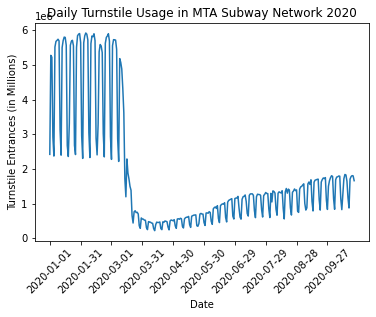

In [129]:
plt.plot(mta_df_grouped)
plt.title("Daily Turnstile Usage in MTA Subway Network 2020")
plt.xlabel("Date")
plt.ylabel("Turnstile Entrances (in Millions)")

ax = plt.gca()
ticks_to_use = mta_df_grouped.index[::30]
ax.set_xticks(ticks_to_use)

plt.xticks(rotation=degrees)

plt.savefig("Graph-Data/Daily_MTA_Turnstile.png")

plt.show

In [69]:
mta_month_mean = mta_df_monthly.groupby(mta_df_monthly['month'])['entries'].mean()

month_list = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October']

mta_month_mean = mta_month_mean.reindex(month_list)

mta_month_mean

month
January      10585.871201
February     10598.949556
March         5601.157780
April          949.943926
May           1186.536939
June          1874.057057
July          2423.552630
August        2585.069881
September     3204.579378
October       3474.467256
Name: entries, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

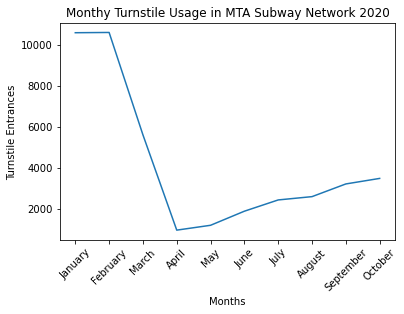

In [130]:
plt.plot(mta_month_mean)
plt.title("Monthy Turnstile Usage in MTA Subway Network 2020")
plt.xlabel("Months")
plt.xticks(rotation=degrees)
plt.ylabel("Turnstile Entrances")

plt.savefig("Graph-Data/Monthly_MTA_Turnstile.png")

plt.show

In [146]:
mta_df_locations = mta_df_monthly.dropna()

mta_df_locations_grouped = mta_df_locations.groupby(['stop_name', 'month']).agg({'entries': ['mean'], 'gtfs_latitude': ['max'], 'gtfs_longitude': ['max']})

mta_df_locations_grouped_jan = mta_df_locations_grouped.loc


entries gtfs_latitude gtfs_longitude
                             mean           max            max
stop_name month                                               
1 Av      April       1243.700000     40.730953     -73.981628
          August      4522.870968     40.730953     -73.981628
          February   13235.517241     40.730953     -73.981628
          January    13994.580645     40.730953     -73.981628
          July        3912.903226     40.730953     -73.981628
...                           ...           ...            ...
Zerega Av June         506.433333     40.836488     -73.847036
          March       1332.419355     40.836488     -73.847036
          May          362.032258     40.836488     -73.847036
          October      934.826087     40.836488     -73.847036
          September    829.900000     40.836488     -73.847036

[3400 rows x 3 columns]

In [148]:
# gmaps.configure(api_key=g_key)

# entries = mta_df_locations_grouped['entries'].astype(float)

# locations = mta_df_locations_grouped[["gtfs_latitude", "gtfs_longitude"]].astype(float)

# fig = gmaps.figure

# layer_1 = gmaps.heatmap_layer(locations, weights=entries, dissipating=False, max_intensity=100, point_radius=1)

# fig